In [171]:
#python packages for data analysis
import pandas as pd
import numpy as np
# import pandas_profiling as pp 
# import warnings
# arnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [253]:
# loading data set.
df = pd.read_csv('mob_data.csv')
#df = df.drop_duplicates(subset=df.columns, keep='first')
df.drop('Rating', axis=1, inplace=True)
df.count()

Price_in_Rupees         696
Off(%)                  696
Ram                     696
Rom                     696
Expandable_GB/TB        696
Screen_in_inch          696
Secondary_Camera(MP)    696
Battery_details         696
Warranty(Year)          696
Dual_sim_num            696
dtype: int64

In [173]:
#data profiling.
#pp.ProfileReport(df)

In [174]:
df.head()

,Price_in_Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Dual_sim_num
0,5999,14,2,16,256,6.1,5,4000,1,1
2,8990,49,3,64,256,5.5,8,3300,1,1
3,10000,10,2,16,128,5.0,5,2630,1,1
4,10000,10,3,16,256,5.2,5,3000,1,1
5,9800,25,3,16,256,5.2,5,3000,1,1


In [175]:
#dir(pp)

In [176]:
# pp.describe_df(df)

In [177]:
# import sklearn.preprocessing for label encoding.

In [181]:
from sklearn.preprocessing import LabelEncoder

price_lb = LabelEncoder()
ram_lb = LabelEncoder()
Rom_lb = LabelEncoder()
Expandable_lb = LabelEncoder()
Screen_in_inch_lb = LabelEncoder()
Secondary_Camera_lb = LabelEncoder()
Battery_details_lb= LabelEncoder()
Warranty_lb= LabelEncoder()
Rating_lb= LabelEncoder()
Dual_sim_num_lb= LabelEncoder()

df['price_encoded'] = price_lb.fit_transform(df.Price_in_Rupees)
df['Ram_encoded'] = ram_lb.fit_transform(df.Ram)
df['Rom_encoded'] = Rom_lb.fit_transform(df.Rom)
df['Expand_encoded'] = Expandable_lb.fit_transform(df['Expandable_GB/TB'])
df['Screen_encoded'] = Screen_in_inch_lb.fit_transform(df.Screen_in_inch)
df['Secondary_Camera_encoded'] = Secondary_Camera_lb.fit_transform(df['Secondary_Camera(MP)'])
df['Battery_encoded'] = Battery_details_lb.fit_transform(df.Battery_details)
df['Warranty_encoded'] = Warranty_lb.fit_transform(df['Warranty(Year)'])
#df['Rating_encoded'] = Rating_lb.fit_transform(df.Rating)
df['Dual_sim_encoded'] = Dual_sim_num_lb.fit_transform(df.Dual_sim_num)

In [182]:
df.head()

,Price_in_Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Dual_sim_num,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Dual_sim_encoded
0,5999,14,2,16,256,6.1,5,4000,1,1,40,1,2,6,19,3,41,0,0
2,8990,49,3,64,256,5.5,8,3300,1,1,71,2,5,6,9,4,31,0,0
3,10000,10,2,16,128,5.0,5,2630,1,1,81,1,2,5,5,3,16,0,0
4,10000,10,3,16,256,5.2,5,3000,1,1,81,2,2,6,6,3,22,0,0
5,9800,25,3,16,256,5.2,5,3000,1,1,78,2,2,6,6,3,22,0,0


In [183]:
df.Price_in_Rupees[0:2]

0    5999
2    8990
Name: Price_in_Rupees, dtype: int64

In [184]:
df.price_encoded[0:2] # After Label Encodig

0    40
2    71
Name: price_encoded, dtype: int64

In [185]:
df.head() # All Columns After Label Encoding 

,Price_in_Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Dual_sim_num,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Dual_sim_encoded
0,5999,14,2,16,256,6.1,5,4000,1,1,40,1,2,6,19,3,41,0,0
2,8990,49,3,64,256,5.5,8,3300,1,1,71,2,5,6,9,4,31,0,0
3,10000,10,2,16,128,5.0,5,2630,1,1,81,1,2,5,5,3,16,0,0
4,10000,10,3,16,256,5.2,5,3000,1,1,81,2,2,6,6,3,22,0,0
5,9800,25,3,16,256,5.2,5,3000,1,1,78,2,2,6,6,3,22,0,0


In [189]:
a = df[['Ram','Rom','Expandable_GB/TB','Screen_in_inch','Secondary_Camera(MP)',
         'Battery_details','Warranty(Year)','Dual_sim_num']]
b = df.Price_in_Rupees

In [190]:
a.shape

(304, 8)

In [191]:
b.shape

(304,)

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(a,b,test_size=0.20,random_state=2)

In [194]:
y_test_.shape

(61,)

In [195]:
# one hot encoding
# from sklearn.preprocessing import OneHotEncoder
# price_ohe = OneHotEncoder()
# ram_ohe = OneHotEncoder()
# Xp = price_ohe.fit_transform(mob.price_encoded.values.reshape(-1,1)).toarray()
# Xr = ram_ohe.fit_transform(mob.Ram_encoded.values.reshape(-1,1)).toarray()

In [196]:
# mobOneHot = pd.DataFrame(Xp,columns = ["price_"+str(int(i)) for i in range(Xp.shape[1])])
# mob = pd.concat([mob, mobOneHot], axis=1)

# dfOneHot = pd.DataFrame(Xm, columns = ["Make"+str(int(i)) for i in range(X.shape[1])])
# df = pd.concat([df, dfOneHot], axis=1)

In [197]:
c=df['Price_in_Rupees']

In [198]:
d=df['price_encoded']

In [199]:
df.columns

Index(['Price_in_Rupees', 'Off(%)', 'Ram', 'Rom', 'Expandable_GB/TB',
       'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details',
       'Warranty(Year)', 'Dual_sim_num', 'price_encoded', 'Ram_encoded',
       'Rom_encoded', 'Expand_encoded', 'Screen_encoded',
       'Secondary_Camera_encoded', 'Battery_encoded', 'Warranty_encoded',
       'Dual_sim_encoded'],
      dtype='object')

In [201]:
df=df.drop(['Price_in_Rupees','Off(%)','Rom','Ram','Expandable_GB/TB','Screen_in_inch','Secondary_Camera(MP)','Battery_details','Warranty(Year)','Dual_sim_num'],axis='columns')

In [202]:
df.head()

,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Dual_sim_encoded
0,40,1,2,6,19,3,41,0,0
2,71,2,5,6,9,4,31,0,0
3,81,1,2,5,5,3,16,0,0
4,81,2,2,6,6,3,22,0,0
5,78,2,2,6,6,3,22,0,0


In [203]:
df.to_csv("Mobiles_dataset1.csv")

In [206]:
x = df[['Ram_encoded','Rom_encoded','Expand_encoded','Screen_encoded','Secondary_Camera_encoded',
         'Battery_encoded','Warranty_encoded','Dual_sim_encoded']]

In [207]:
y = df.price_encoded

In [208]:
df.drop(['price_encoded'],axis=1).head()

,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Dual_sim_encoded
0,1,2,6,19,3,41,0,0
2,2,5,6,9,4,31,0,0
3,1,2,5,5,3,16,0,0
4,2,2,6,6,3,22,0,0
5,2,2,6,6,3,22,0,0


In [209]:
# seaborn  for data Visualization
import seaborn as sns

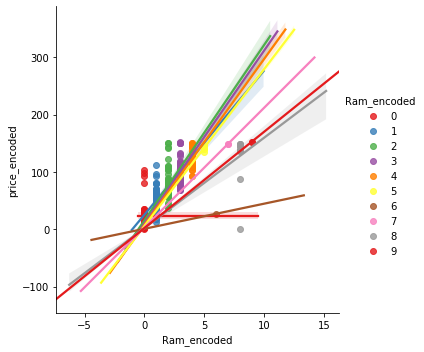

In [210]:
g = sns.lmplot(x="Ram_encoded", y="price_encoded", hue="Ram_encoded",data=df, palette="Set1")

In [211]:
y.shape, x.shape

((304,), (304, 8))

In [212]:
# By using train_test_split() method spliting 80% data for training,20% data for testing the model.
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=2)

In [214]:
y_test.shape

(61,)

In [215]:
# LinearRegression Algorithm :Linear Regression is one of the widely used Machine Learning Algorithms by
#Data Scientists. It is used to make predictions on numerical data.
from sklearn.linear_model import LinearRegression

In [216]:
# Alogorithm object created.
lr_model = LinearRegression()

In [217]:
lr_model1 = lr_model.fit(X_train,y_train)

In [218]:
lr_model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
lr_model2 = lr_model.fit(X_test,y_test)

In [220]:
lr_model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
predicted_price1=lr_model1.predict(X_test) #predicting price on testing data.
predicted_price1

array([ 90.21199839,  72.74792086,  45.09207544, 114.90175145,
        71.93130239,  56.0021519 ,   0.4853931 ,  74.05788346,
       109.05434796,  98.32651256,  81.1822113 ,  49.60073349,
       111.87001988,  72.13199465,  79.80440058, 120.87675592,
        75.11094593,  71.74890128,  79.80440058,  93.25403884,
        45.0365117 ,  95.28675084,  18.72039946, 117.6740298 ,
        63.96704874,  64.3616686 ,  12.42159316, 132.32418722,
        76.05040277,  50.9270549 , 111.20009405,  24.98140503,
       111.12877508,  49.40098571,  88.24587008,  90.49947088,
       107.94137624,  75.60155355, 102.513091  ,  49.35119717,
        74.25747121,  99.63656537, 102.88465788,  63.96704874,
        82.61627488,  98.11650283, 125.8966562 ,  55.01309299,
        64.29591275,  32.95315767, 115.44941516, 117.93999428,
       102.51403548,  80.31865916,  47.02514317, 132.49782239,
       100.06898596,  35.34904001, 127.00864333,  26.87938565,
        26.48232897])

In [222]:
predicted_price2 = lr_model2.predict(X_train)# predicting price on Training data.
predicted_price2

array([ 46.23222088,  45.72804144, 102.51403548,  78.38699356,
        77.47659623, 101.0349469 ,  71.61511072,  32.57763313,
        58.13206928,  13.18032783, 117.93999428, 143.41965839,
       130.21078868,  78.38699356,  50.9270549 ,  88.95253735,
        22.14173565,  94.03932089, 132.93893922,  78.53246858,
        54.42802004, 123.49900484,  80.36425858,  36.8383207 ,
        76.01715767,  91.99229907, 133.92558169, 121.63403958,
        78.43480189,  81.1822113 ,  98.63738576,  44.67361816,
        66.00516748,  42.34466602,  88.10713605,  98.11650283,
        84.5504904 ,  37.37958991,  44.67235361,  95.73230703,
       104.02425716, 129.83321833, 104.86588056,  29.50649172,
        99.01196582, 114.93704554,  63.96704874,  61.38671632,
        44.99471002, 135.68634863,  26.55565365,  81.50596985,
        16.29930412,  19.99233147,  84.98815976, 104.92767875,
         9.32900788, 101.18124976,  99.9724502 ,  33.21359913,
        50.9270549 ,   6.08737968,  37.37958991,  91.25

In [230]:
# Accuracy on testing data.
accuracy = lr_model1.score(X_test,y_test)*100

accuracy =  np.around(accuracy, decimals=2) # for 2float  points
print("ACCURACY:",accuracy,"%")

ACCURACY: 64.96 %


In [231]:
# Accuracy on training data.
accuracy = lr_model2.score(X_train,y_train)*100

accuracy =  np.around(accuracy, decimals=2)# for 2float  points
print("ACCURACY:",accuracy,"%")

ACCURACY: 66.09 %


In [232]:
from sklearn.model_selection import cross_val_score

In [233]:
cross_val_score(lr_model,x,y, cv=5) # finding cross validation score.for Best accuracy.

array([0.70332873, 0.57231501, 0.79990759, 0.5480614 , 0.43280616])

In [234]:
# comparing with Actual_Mobile_price and Predicted_Mobile_price
compar = pd.DataFrame({"Actual_price_(encoded)":y_test,"predicted_price":predicted_price1})

In [235]:
act_and_pred2=compar.head(50)

In [236]:
act_and_pred2.head(3)

,Actual_price_(encoded),predicted_price
167,72,90.211998
668,72,72.747921
155,31,45.092075


In [237]:
# act_and_pred2.to_csv('final_output.csv')

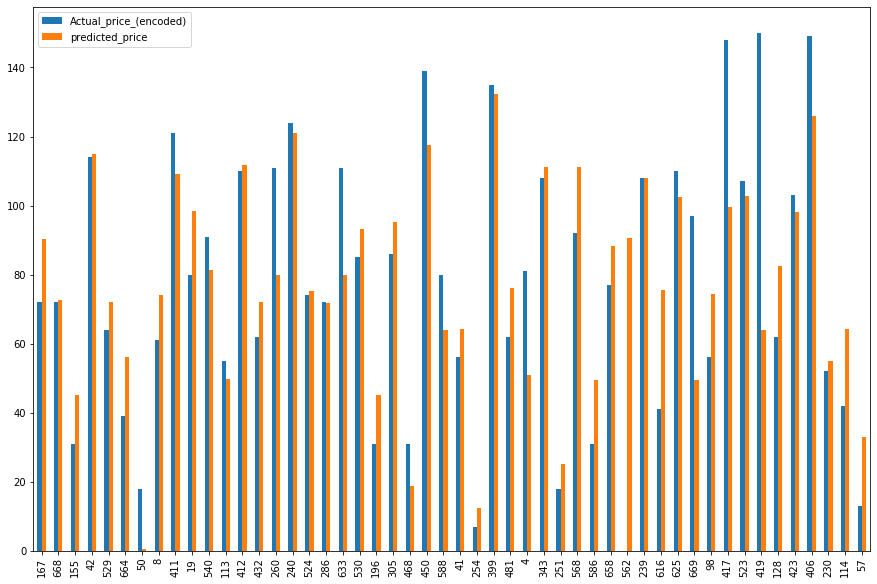

In [238]:
import matplotlib.pyplot as plt
act_and_pred2.plot(kind='bar',figsize=(15,10))
# plt.grid(linewidth='0.5', color='green')
# plt.grid(linewidth='0.5', color='blue')
plt.show()

In [239]:
# act_and_pred2.hist(bins=50, figsize=(15, 5))
# plt.show()
from sklearn import metrics

In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_price1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_price1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_price1))) 

Mean Absolute Error: 15.96973266263754
Mean Squared Error: 550.0786142045346
Root Mean Squared Error: 23.453754799701787


In [241]:
metrics.mean_squared_log_error(y_test,predicted_price1)

0.5505307859526433

In [242]:
metrics.median_absolute_error(y_test,predicted_price1)

11.94565204204487

In [243]:
metrics.explained_variance_score(y_test,predicted_price1)     

0.6495643917265712

In [244]:
df_2=pd.DataFrame(act_and_pred2)

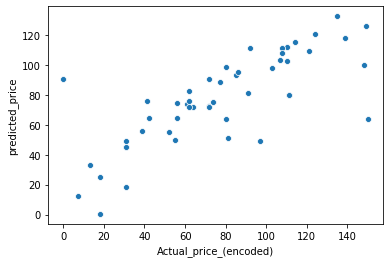

In [245]:
sns.scatterplot(x="Actual_price_(encoded)", y="predicted_price",data=df_2,palette="set2")

In [246]:
#y = m1*Ram+ m2*Rom+ m3*Expandable +m4*Screen +m5*Secondary_Camera +m6*Battery+m7*Warranty......+b

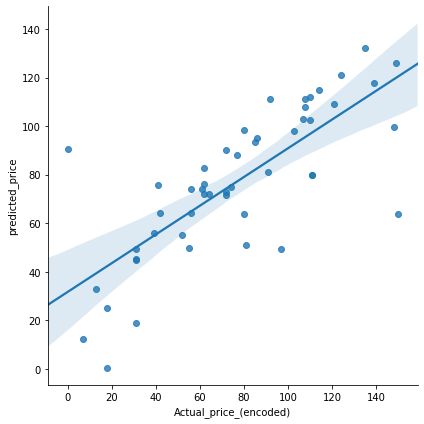

In [247]:
#Now that we have made our predictions, lets visualize our train and test set results by 
#building a  lmplot of the data and drawing the prediction line.

sns.lmplot(x="Actual_price_(encoded)", y="predicted_price",data=df_2,palette="set1",height=6)

In [248]:
#finding coef for all features.
lr_model.coef_

array([6.60116619, 6.33421349, 2.74740942, 0.38309337, 3.11897629,
       0.635966  , 0.        , 0.        ])

In [249]:
#finding coef for each feature.
for coef in zip(df, lr_model.coef_):
    print(coef)

('price_encoded', 6.60116619394024)
('Ram_encoded', 6.334213485339424)
('Rom_encoded', 2.7474094161492255)
('Expand_encoded', 0.38309336617313505)
('Screen_encoded', 3.1189762921228814)
('Secondary_Camera_encoded', 0.6359660012460431)
('Battery_encoded', 0.0)
('Warranty_encoded', 0.0)


In [250]:
lr_model.intercept_

-17.074902059494647

In [251]:
9.80263447*2+ 8.49374169*5+(-2.78474221*6)+0.51293224*9+1.1177527*4+( -0.13397062*31)+  0*0+ 2.61437022*10+0*0+2.0964871285278264

78.54002519852783

In [252]:
df.head(4)

,price_encoded,Ram_encoded,Rom_encoded,Expand_encoded,Screen_encoded,Secondary_Camera_encoded,Battery_encoded,Warranty_encoded,Dual_sim_encoded
0,40,1,2,6,19,3,41,0,0
2,71,2,5,6,9,4,31,0,0
3,81,1,2,5,5,3,16,0,0
4,81,2,2,6,6,3,22,0,0
